In [1]:
import cv2

In [153]:
import requests

with open('kaptcha.jpg', 'wb') as f:
    res = requests.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

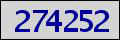

In [580]:
from PIL import Image

image = Image.open('kaptcha.jpg')
image

In [581]:
import PIL
import numpy

pil_image = PIL.Image.open('kaptcha.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)

In [582]:
#open_cv_image

Populating the interactive namespace from numpy and matplotlib


c:\users\bryson0083\anaconda3\envs\opencvtest\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


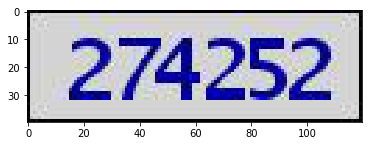

In [583]:
%pylab inline
from matplotlib import pyplot as plt

plt.imshow(open_cv_image)

In [584]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [585]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [586]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if w>= 14 and h == 24:
        if w >= 20:
            w1 = int(w / 2)
            ary.append((x,y,w1,h))
            ary.append((x+w1,y,w1,h))
        else:
            ary.append((x,y,w,h))

(1, 1, 118, 38)
(14, 9, 17, 24)
(32, 9, 17, 24)
(45, 9, 18, 24)
(49, 15, 6, 7)
(63, 9, 16, 24)
(79, 9, 15, 24)
(93, 9, 17, 24)


In [587]:
print(ary)

[(14, 9, 17, 24), (32, 9, 17, 24), (45, 9, 18, 24), (63, 9, 16, 24), (79, 9, 15, 24), (93, 9, 17, 24)]


Populating the interactive namespace from numpy and matplotlib


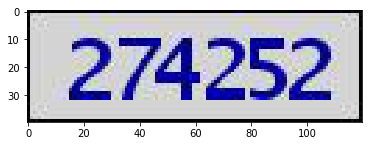

In [588]:
%pylab inline
plt.imshow(open_cv_image)

In [589]:
ary

[(14, 9, 17, 24),
 (32, 9, 17, 24),
 (45, 9, 18, 24),
 (63, 9, 16, 24),
 (79, 9, 15, 24),
 (93, 9, 17, 24)]

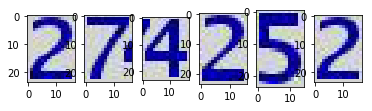

In [590]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

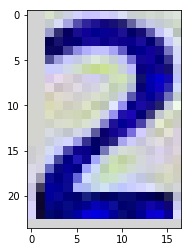

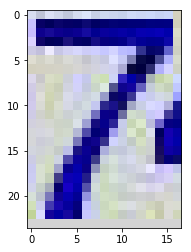

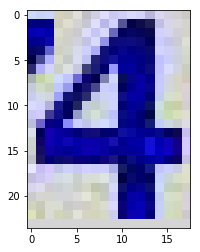

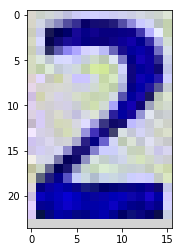

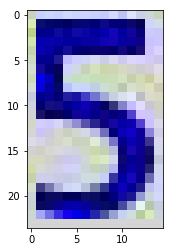

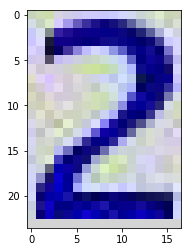

In [591]:
from matplotlib import pyplot as plt
import time
from datetime import datetime
ct = int(time.mktime(datetime.now().timetuple()))
for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    #plt.savefig('{}_{}.jpg'.format(ct, id+1), dpi=100)
    plt.savefig('{}.jpg'.format(id+1), dpi=100)